In [1]:
import sys, os
#path2add = os.path.normpath(os.path.abspath(os.path.join(os.path.dirname(__file__), os.path.pardir, 'dir1')))
#print(os.getcwd())
parent_path = os.path.normpath(os.path.abspath(os.path.join(os.getcwd(), os.path.pardir)))
#print(path2add)
sys.path.append(parent_path)
sys.path.append(os.path.normpath(os.path.join(parent_path,"gyrii")))

import json
import yaml
from underpinnings.OccupancyMap2 import OccupancyMap2, LidarMeasurement, ExactLidarMeasurement
import numpy as np
from gyrii.underpinnings.BayesianArray import BayesianArray

import json
import yaml
mymap=OccupancyMap2.load_from_file("../local_map.npy")
mymap.resolution=0.1
res=0.1


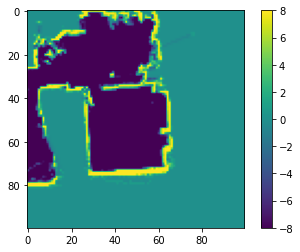

position: [6. 0.]


In [2]:
plottoshow=np.flip(mymap.gridmap_logodds,1).T

#startx=100
#endx=300
#startx=0
#endx=400
#starty=150
#endy=300

import matplotlib.pyplot as plt
plt.figure()
#plt.imshow(plottoshow)
plt.imshow(plottoshow[50:150,100:200])
#plt.imshow(plottoshow[(400-endy):(400-starty),startx:endx],extent=[res*(startx-200),res*(endx-200),res*(starty-200),res*(endy-200)])
plt.colorbar()
plt.show()
position=mymap.cell_to_coord( (160,100))
print("position: {}".format(position))


position: [6. 0.]
unknown
blocked
blocked
blocked
blocked
blocked
blocked
blocked
blocked
blocked
blocked
blocked
blocked
blocked
blocked
blocked
blocked
blocked
free
free
free
free
free
free
blocked
blocked
blocked
blocked
blocked
unknown
duration was 0.004986286163330078


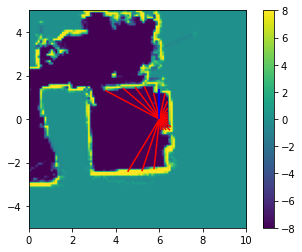

In [6]:
from matplotlib import collections  as mc
import time

position=mymap.cell_to_coord( (160,100))
print("position: {}".format(position))
def to_line(position,angle,dist):    
    end_position=position+dist*np.array([np.sin(angle),np.cos(angle)])
    print("start {}, end {}".format(position,end_position))
    start_cell=mymap.coord_to_cell(position)
    end_cell=mymap.coord_to_cell(end_position)
    return [ start_cell,end_cell]
    
angle=0
max_dist=3.0

lines=[]
colors=[]
start_time=time.time()
for angle in np.linspace(0,2*np.pi,30):
    dist,stat=mymap.raytrace_through_free(position,angle,max_dist=max_dist,breakthrough=3)    
    end_position=position+dist*np.array([np.sin(angle),np.cos(angle)])
    print(stat)
    if stat=="blocked":
        colors.append("red")
        lines.append( [[position[0],position[1]],[end_position[0],end_position[1]]])            
    elif stat=="unknown":
        colors.append("blue")
        lines.append( [[position[0],position[1]],[end_position[0],end_position[1]]])
    #print("stat: {}".format(stat))
    #lines.append( [[position[0],position[1]],[end_position[0],end_position[1]]])
print("duration was {}".format(time.time()-start_time))
    
startx=100
endx=200

starty=50
endy=150
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

lc = mc.LineCollection(lines,colors=colors)
ax.add_collection(lc)
#plt.imshow(plottoshow[50:150,100:200])

plt.imshow(plottoshow[(200-endy):(200-starty),startx:endx],extent=[res*(startx-100),res*(endx-100),res*(starty-100),res*(endy-100)])

#plt.imshow(plottoshow[(400-endy):(400-starty),startx:endx],extent=[res*(startx-200),res*(endx-200),res*(starty-200),res*(endy-200)])
plt.colorbar()
plt.show()


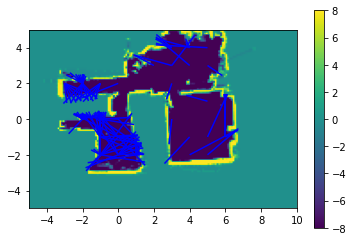

In [10]:
pos_grid_res=1.0
nbins=200
lines=[]
colors=[]
for x in np.arange(-res*nbins/2,res*nbins/2,pos_grid_res):
    for y in np.arange(-res*nbins/2,res*nbins/2,pos_grid_res):
        position=np.array([x,y])
        start_cell=mymap.coord_to_cell(position)
        if mymap.gridmap_logodds[start_cell]>-2:
            continue
        for angle in np.linspace(0,2*np.pi,30):
            dist,stat=mymap.raytrace_through_free(position,angle,max_dist=max_dist,breakthrough=3)        
            end_position=position+dist*np.array([np.sin(angle),np.cos(angle)])
            if stat=="blocked":
                ...
                #colors.append("red")
                #lines.append( [[position[0],position[1]],[end_position[0],end_position[1]]])            
            elif stat=="unknown":
                colors.append("blue")
                lines.append( [[position[0],position[1]],[end_position[0],end_position[1]]])
        #print("stat: {}".format(stat))
            

        
startx=50
endx=200

starty=50
endy=150
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

lc = mc.LineCollection(lines,colors=colors)
ax.add_collection(lc)
#plt.imshow(plottoshow[50:150,100:200])

plt.imshow(plottoshow[(200-endy):(200-starty),startx:endx],extent=[res*(startx-100),res*(endx-100),res*(starty-100),res*(endy-100)])

#plt.imshow(plottoshow[(400-endy):(400-starty),startx:endx],extent=[res*(startx-200),res*(endx-200),res*(starty-200),res*(endy-200)])
plt.colorbar()
plt.show()
        

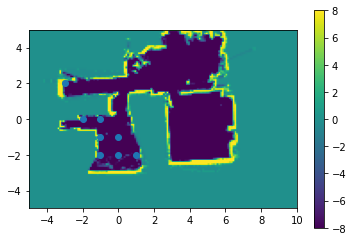

In [17]:
pos_grid_res=1.0
nbins=200
#lines=[]
colors=[]
good_points_x=[]
good_points_y=[]
for x in np.arange(-res*nbins/2,res*nbins/2,pos_grid_res):
    for y in np.arange(-res*nbins/2,res*nbins/2,pos_grid_res):
        position=np.array([x,y])
        start_cell=mymap.coord_to_cell(position)
        if mymap.gridmap_logodds[start_cell]>-2:
            continue
        uncount=0
        for angle in np.linspace(0,2*np.pi,30):
            dist,stat=mymap.raytrace_through_free(position,angle,max_dist=max_dist,breakthrough=3)        
            end_position=position+dist*np.array([np.sin(angle),np.cos(angle)])
            if stat=="unknown":
                uncount+=1
        if uncount>5 and uncount < 15:
            good_points_x.append(position[0])
            good_points_y.append(position[1])
            colors.append("red")
        #print("stat: {}".format(stat))
            

        
startx=50
endx=200

starty=50
endy=150
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

#lc = mc.LineCollection(lines,colors=colors)
#ax.add_collection(lc)
#plt.imshow(plottoshow[50:150,100:200])
plt.scatter(good_points_x,good_points_y)

plt.imshow(plottoshow[(200-endy):(200-starty),startx:endx],extent=[res*(startx-100),res*(endx-100),res*(starty-100),res*(endy-100)])

#plt.imshow(plottoshow[(400-endy):(400-starty),startx:endx],extent=[res*(startx-200),res*(endx-200),res*(starty-200),res*(endy-200)])
plt.colorbar()
plt.show()
        